In [1]:
from pmdarima import auto_arima
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
NEW_STEPWISE = False

In [3]:
data = pd.read_csv("./Dataset/dataOld.csv")
data = data.head(80)

In [4]:
teste = data.copy()
teste["timestamp"] = teste["timestamp"] / 1000
teste["timestamp"] = teste['timestamp'].apply(lambda x: datetime.fromtimestamp(x))
teste.reset_index(drop=True, inplace=True)

In [5]:
if NEW_STEPWISE:
    stepwise_model = auto_arima(teste['price'], trace=True, suppress_warnings=True)
    stepwise_model.summary()

'''

Best model:  ARIMA(4,1,5)(0,0,0)[0]          
Total fit time: 1037.301 seconds

'''

'\n\nBest model:  ARIMA(4,1,5)(0,0,0)[0]          \nTotal fit time: 1037.301 seconds\n\n'

In [6]:
teste = teste[['timestamp','price']]
teste = teste.set_index('timestamp')
loki,doki = train_test_split(teste, test_size=0.3, shuffle=False)

model = sm.tsa.ARIMA(loki, order=(4,1,5))
model = model.fit()
model.summary()

/home/mickael/.pyenv/versions/3.11.9/envs/dnnDef/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
/home/mickael/.pyenv/versions/3.11.9/envs/dnnDef/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
/home/mickael/.pyenv/versions/3.11.9/envs/dnnDef/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   56
Model:                 ARIMA(4, 1, 5)   Log Likelihood                -196.560
Date:                Tue, 16 Jul 2024   AIC                            413.121
Time:                        09:44:00   BIC                            433.194
Sample:                    01-01-2020   HQIC                           420.883
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7591      0.403     -1.886      0.059      -1.548       0.030
ar.L2         -0.4480      0.476     -0.941      0.347      -1.381       0.485
ar.L3         -0.7433      0.406     -1.831      0.067      -1.539       0.052
ar.L4         -0.7401      0.445     -1.662      0.096      -1.613       0.133
ma.L1          0.4147      0.579      0.716      0.474      -0.720       1.549
ma.L2          0.0777      0.518      0.150      0.881      -0.938       1.093
ma.L3          0.6136      0.758      0.810      0.418      -0.871       2.098
ma.L4          0.7606      0.610      1.247      0.212      -0.435       1.956
ma.L5         -0.2211      0.392     -0.564      0.573      -0.989       0.547
sigma2        69.7179     48.639      1.433      0.152     -25.613     165.049
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.93
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -1.01
Prob(H) (two-sided):                  0.58   Kurtosis:                         4.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
start = len(loki)
end = len(loki) + len(doki) - 1
predictions = model.predict(start=start, end=end, typ='levels')
print(predictions)

2020-01-01 14:00:00    7240.393874
2020-01-01 14:15:00    7229.988713
2020-01-01 14:30:00    7229.464485
2020-01-01 14:45:00    7236.265345
2020-01-01 15:00:00    7239.818743
2020-01-01 15:15:00    7242.164690
2020-01-01 15:30:00    7234.124669
2020-01-01 15:45:00    7231.501969
2020-01-01 16:00:00    7232.721482
2020-01-01 16:15:00    7237.210992
2020-01-01 16:30:00    7241.156519
2020-01-01 16:45:00    7237.184640
2020-01-01 17:00:00    7234.192092
2020-01-01 17:15:00    7231.987839
2020-01-01 17:30:00    7235.034167
2020-01-01 17:45:00    7238.873336
2020-01-01 18:00:00    7238.447460
2020-01-01 18:15:00    7236.417530
2020-01-01 18:30:00    7233.040944
2020-01-01 18:45:00    7233.988755
2020-01-01 19:00:00    7236.606238
2020-01-01 19:15:00    7238.206928
2020-01-01 19:30:00    7237.613566
2020-01-01 19:45:00    7234.699709
Freq: 15min, Name: predicted_mean, dtype: float64


/home/mickael/.pyenv/versions/3.11.9/envs/dnnDef/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='timestamp'>

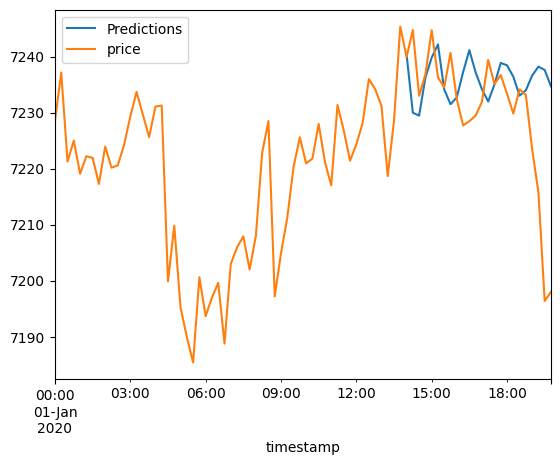

In [8]:
import matplotlib.pyplot as plt

# Criação de uma figura e eixos
fig, ax = plt.subplots()

# Plotar 'predictions' no mesmo eixo
predictions.plot(ax=ax, legend=True, label='Predictions')

# Plotar 'doki' no mesmo eixo
teste.plot(ax=ax, legend=True, label='Doki')